In [1]:
# Get data from working directory
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

base_dir = os.getcwd()
print('Working in:', base_dir)

Working in: /home/rentfree/Documents/FIRE and Inequality/Single Best Explanatory Factor


In [2]:
years_used = list(range(1964,2020))
Income_df = pd.DataFrame(data = years_used, columns = ['Year'])
Wealth_df = pd.DataFrame(data = years_used, columns = ['Year'])

In [3]:
# Data is wealth and income shares of income demographic
# Numbers represent percent share
# Scraped from the world inequality database
# https://wid.world/

WI = os.path.join(base_dir, 'WI_shares_all.csv')
WI_df = pd.read_csv(WI)

Income_Share_df = pd.pivot_table(
    WI_df,
    index = "Year",
    columns = "Percentile",
    values = "Pretax Income Share").reset_index()

Wealth_Share_df = pd.pivot_table(
    WI_df,
    index = "Year",
    columns = "Percentile",
    values = "Net Personal Wealth Share").reset_index()

Percentile_Index = ['Year', 'p0p50','p50p90','p90p99','p99p100']

Income_Share_df['p90p99'] = Income_Share_df['p90p100'] - Income_Share_df['p99p100'] 
Income_Share_df = Income_Share_df.drop('p90p100', 1)
Income_Share_df = Income_Share_df[Percentile_Index]

Wealth_Share_df['p90p99'] = Wealth_Share_df['p90p100'] - Wealth_Share_df['p99p100'] 
Wealth_Share_df = Wealth_Share_df.drop('p90p100', 1)
Wealth_Share_df = Wealth_Share_df[Percentile_Index]

Income_df = pd.merge(Income_df, Income_Share_df, on = 'Year')
Wealth_df = pd.merge(Wealth_df, Wealth_Share_df, on = 'Year')

Percentile_Index = Percentile_Index[1:]


In [4]:
Explanatory_Frames = []

In [5]:
FCER = os.path.join(base_dir, 'FIRE Compensation to Employment Ratio.csv')
FIRE_Comp_df = pd.read_csv(FCER)
FIRE_Comp_df = FIRE_Comp_df.drop(columns = 'Unnamed: 0')
Explanatory_Frames.append(FIRE_Comp_df)

In [6]:
# Data is Civilian employment and unemployment by sex and age
# Scraped from Economic Report of the President using
# 2021 Table B-23 "Used years 1975-2019" https://www.govinfo.gov/app/collection/erp/2021
# 1997 Table B-34 "Used years 1948-1997" https://www.govinfo.gov/app/collection/erp/1997
# Data is spliced together before hand in a spreadsheet
# This will be the measure of unemployment

MWE = os.path.join(base_dir, 'Men Women Employment.ods')
MWE_df = pd.read_excel(MWE)

# Unlike Van Arnums Paper we will use ages 20 and over as a better
"""The entry of women into the workforce was most pronounced
during the 1960s and 1970s, before income inequality rose significantly in the 1980s. Its effects on income inequality depend on
whether upper-income or working-class women had higher increases
in labor force participation. Ryscavage (1999: 114–115) suggested that
it was higher-income households that experienced an increase in dual
earners since poorer married women were already working, so that
women’s higher labor force participation (FemaleLF) exacerbated
income inequality."""
# We want the percentage share of women of the workforce
Women_LF_df = pd.DataFrame()
Women_LF_df['Year'] = MWE_df['Year']
Women_LF_df['Women Workforce Participation'] = MWE_df['Women 20 years and over']/MWE_df['All civilian workers']

Explanatory_Frames.append(Women_LF_df)

In [7]:
# Data is Educational Attainment of the Population 25 Years and Over
# Numbers in thousands
# Only took the total counted, high school graduates, 1-3 years college attained, and 4+ year college attained
# scrape data by year and get educational attainment in the us

# 1940-2016 scraped by the below link under historical tables, table A-1
# https://www.census.gov/data/tables/2016/demo/education-attainment/cps-detailed-tables.html

# 2017 Table 2 Both Sexes
# https://www.census.gov/data/tables/2017/demo/education-attainment/cps-detailed-tables.html

# 2018 Table 2 Both Sexes
# https://www.census.gov/data/tables/2018/demo/education-attainment/cps-detailed-tables.html

# 2019 Table 2 Both Sexes
# https://www.census.gov/data/tables/2019/demo/educational-attainment/cps-detailed-tables.html

# Data is spliced together before hand in a spreadsheet
# This will be the measure of education

EA = os.path.join(base_dir, 'Educational Attainment of Population 25 Years and Over.ods')
EA_df = pd.read_excel(EA)
EA_df.head()

# We will get the share of people over 25 that have had 4 years or more uni
Share_College_Edu_df = pd.DataFrame()
Share_College_Edu_df['Year'] = EA_df['Years']
Share_College_Edu_df['Share College 4 years or more'] = EA_df['College 4 years or more']/EA_df['Total']

Share_College_Edu_df = Share_College_Edu_df[::-1].reset_index(drop=True)

Explanatory_Frames.append(Share_College_Edu_df)

In [8]:
# Data is union membership as a share of of workers
# Scraped from http://unionstats.com/
# http://unionstats.com/MonthlyLaborReviewArticle.htm
# Data is spliced together before hand in a spreadsheet
# This will be the measure of the strength of unions

Union = os.path.join(base_dir, 'Union Membership Density.ods')
Union_df = pd.read_excel(Union)
Union_df['Share of Union workers of total workers'] = Union_df['Share of Union workers of total workers']/100
Union_df = Union_df[::-1].reset_index(drop=True)

Explanatory_Frames.append(Union_df)

In [9]:
# Data is Average Hourly Earnings of Production and Nonsupervisory Employees, Total Private
# Scraped from the Federal Reserve
# https://fred.stlouisfed.org/series/AHETPI

# Federal Minimum Hourly Wage for Nonfarm Workers for the United States
# Scraped from the Federal Reserve
# https://fred.stlouisfed.org/series/FEDMINNFRWG

# We will divide hourly minimum wage with hourly earnings of production
# This will be the measure of minimum wage

AHETPI = os.path.join(base_dir, 'AHETPI.csv')
AHETPI_df = pd.read_csv(AHETPI)

FEDMINNFRWG = os.path.join(base_dir, 'FEDMINNFRWG.csv')
FEDMINNFRWG_df = pd.read_csv(FEDMINNFRWG)

FEDMINNFRWGyr_df = FEDMINNFRWG_df.loc[FEDMINNFRWG_df['DATE'].str.contains('-12-')]
FEDMINNFRWGyr_df['DATE'] = pd.DatetimeIndex(FEDMINNFRWGyr_df['DATE']).year
FEDMINNFRWGyr_df = FEDMINNFRWGyr_df.loc[FEDMINNFRWGyr_df['DATE']>= 1964]
FEDMINNFRWGyr_df = FEDMINNFRWGyr_df.reset_index(drop = True)

AHETPIyr_df = AHETPI_df.loc[AHETPI_df['DATE'].str.contains('-12-')]
AHETPIyr_df['DATE'] = pd.DatetimeIndex(AHETPIyr_df['DATE']).year
AHETPIyr_df = AHETPIyr_df.reset_index(drop = True)

MinWage_adj_df = pd.DataFrame()
MinWage_adj_df['Year'] = AHETPIyr_df['DATE']
MinWage_adj_df['Min Wage/Production'] = FEDMINNFRWGyr_df['FEDMINNFRWG']/AHETPIyr_df['AHETPI']

Explanatory_Frames.append(MinWage_adj_df)

<ipython-input-9-3e552a624ae1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEDMINNFRWGyr_df['DATE'] = pd.DatetimeIndex(FEDMINNFRWGyr_df['DATE']).year
<ipython-input-9-3e552a624ae1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AHETPIyr_df['DATE'] = pd.DatetimeIndex(AHETPIyr_df['DATE']).year


In [10]:
# Data is Shares of gross domestic product: Imports of goods and services
# Scraped from the Federal Reserve
# https://fred.stlouisfed.org/series/B021RE1A156NBEA
# This will be the measure for globalism

USI = os.path.join(base_dir, 'Import Share.csv')
USI_df = pd.read_csv(USI)

US_import_shr_df = pd.DataFrame()
US_import_shr_df['Year'] = pd.DatetimeIndex(USI_df['DATE']).year
US_import_shr_df['Import Share of GDP'] = USI_df['B021RE1A156NBEA']/100

Explanatory_Frames.append(US_import_shr_df)

In [11]:
# Data is unemployment rate
# Scraped from the bureau of labor statistics
# https://data.bls.gov/pdq/SurveyOutputServlet
# Using the december rate

"""We include the inverse of the
unemployment rate (U) to measure this cyclical effect; experiments
found that lagging 1/U two years (1/Ut-2) to capture the divergent
behavior of profit and wage incomes after a recession was most
successful."""

unemployment_rate = os.path.join(base_dir, 'Unemployment Rate.csv')
unemployment_rate_df = pd.read_csv(unemployment_rate)
unemployment_rate_df['Unemployment Rate'] = unemployment_rate_df['Unemployment Rate']
Explanatory_Frames.append(unemployment_rate_df)
unemployment_rate_df.head()

,Year,Unemployment Rate
0,1948,4.0
1,1949,6.6
2,1950,4.3
3,1951,3.1
4,1952,2.7


In [12]:
for frame in Explanatory_Frames:
    Income_df = pd.merge(Income_df, frame, on = 'Year')
    Wealth_df = pd.merge(Wealth_df, frame, on = 'Year')

Income_df = Income_df.rename(columns = {'p0p50': 'Bottom 50', 'p50p90': 'Middle 40', 'p90p99': 'Next 9', 'p99p100': 'Top 1',
                                        'Women Workforce Participation': 'Womens Workforce Participation Ratio',
                                        'Share College 4 years or more': 'Educational Attainment',
                                        'Share of Union workers of total workers': 'Union/Total workers'})

Wealth_df = Wealth_df.rename(columns = {'p0p50': 'Bottom 50', 'p50p90': 'Middle 40', 'p90p99': 'Next 9', 'p99p100': 'Top 1',
                                        'Women Workforce Participation': 'Womens Workforce Participation Ratio',
                                        'Share College 4 years or more': 'Educational Attainment',
                                        'Share of Union workers of total workers': 'Union/Total workers'})
Income_df.head()

,Year,Bottom 50,Middle 40,Next 9,Top 1,FIRE Compensation to Employment Ratio,Womens Workforce Participation Ratio,Educational Attainment,Union/Total workers,Min Wage/Production,Import Share of GDP,Unemployment Rate
0,1964,0.1868,0.4451,0.2387,0.1294,1.029835,0.316038,0.091241,0.293,0.484496,0.041,5.0
1,1965,0.1916,0.4438,0.2359,0.1287,1.026280,0.318338,0.094358,0.289,0.468165,0.042,4.0
2,1966,0.1960,0.4427,0.2332,0.1282,1.029219,0.322519,0.098310,0.284,0.449640,0.046,3.8
3,1967,0.2090,0.4406,0.2281,0.1223,1.034060,0.328040,0.100606,0.283,0.479452,0.046,3.8
4,1968,0.2068,0.4405,0.2284,0.1243,1.036501,0.332995,0.104923,0.282,0.514469,0.049,3.4


In [13]:
Explanatory_Index = ['FIRE Compensation to Employment Ratio', 'Womens Workforce Participation Ratio', 'Educational Attainment', 
'Union/Total workers', 'Min Wage/Production', 'Import Share of GDP', 'Unemployment Rate']
Dependent_Index = ['Bottom 50', 'Middle 40', 'Next 9', 'Top 1']

In [14]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller


# Get income regression
stats_df = pd.DataFrame(columns = ['Population', 'Explanatory Variable', 'Coefficient', 't-value', 'f-value', 'r-squared', 'durbin watson', 'dickey fuller'])

for dep in Dependent_Index:
    for exp_var in Explanatory_Index:
        X = sm.add_constant(Income_df[exp_var].to_numpy())
        Y = Income_df[dep].to_numpy()
        lr = sm.OLS(Y, X).fit()

        t = lr.tvalues[1]
        f = lr.fvalue
        rsq = lr.rsquared
        x1 = lr.params[1]
        dw = durbin_watson(lr.resid)
        ad = adfuller(Income_df[exp_var].to_numpy())[0]

        stats_df.loc[len(stats_df)] = [dep, exp_var, x1, t, f, rsq, dw, ad]

In [15]:
stats_df.loc[stats_df['Population']==Dependent_Index[0]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
0,Bottom 50,FIRE Compensation to Employment Ratio,-0.119573,-28.043113,786.416183,0.935746,0.307110,-0.236951
1,Bottom 50,Womens Workforce Participation Ratio,-0.561047,-16.550420,273.916388,0.835324,0.133539,-3.102473
2,Bottom 50,Educational Attainment,-0.341277,-22.657809,513.376288,0.904825,0.205431,1.522842
3,Bottom 50,Union/Total workers,0.421802,24.510142,600.747043,0.917525,0.177998,-2.260296
4,Bottom 50,Min Wage/Production,0.445897,10.356083,107.248457,0.665113,0.285898,-1.795480
5,Bottom 50,Import Share of GDP,-0.645529,-16.250985,264.094507,0.830239,0.326118,-1.584384
6,Bottom 50,Unemployment Rate,0.000852,0.385035,0.148252,0.002738,0.018671,-3.608148


In [16]:
stats_df.loc[stats_df['Population']==Dependent_Index[1]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
7,Middle 40,FIRE Compensation to Employment Ratio,-0.067017,-14.637147,214.246081,0.798692,0.265769,-0.236951
8,Middle 40,Womens Workforce Participation Ratio,-0.229786,-5.761962,33.200204,0.380735,0.148908,-3.102473
9,Middle 40,Educational Attainment,-0.175678,-10.046977,100.941755,0.651482,0.234330,1.522842
10,Middle 40,Union/Total workers,0.192252,7.616685,58.013896,0.517917,0.170600,-2.260296
11,Middle 40,Min Wage/Production,0.203287,5.699773,32.487415,0.375632,0.181389,-1.795480
12,Middle 40,Import Share of GDP,-0.327029,-8.617455,74.260527,0.578982,0.148643,-1.584384
13,Middle 40,Unemployment Rate,0.003591,2.865912,8.213454,0.132021,0.070999,-3.608148


In [17]:
stats_df.loc[stats_df['Population']==Dependent_Index[2]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
14,Next 9,FIRE Compensation to Employment Ratio,0.051808,21.239630,451.121864,0.893095,0.421773,-0.236951
15,Next 9,Womens Workforce Participation Ratio,0.242829,14.495543,210.120754,0.795548,0.199485,-3.102473
16,Next 9,Educational Attainment,0.152660,25.000981,625.049037,0.920477,0.456567,1.522842
17,Next 9,Union/Total workers,-0.183434,-20.110752,404.442331,0.882210,0.276148,-2.260296
18,Next 9,Min Wage/Production,-0.195006,-9.942987,98.862998,0.646743,0.287740,-1.795480
19,Next 9,Import Share of GDP,0.284767,15.759758,248.369982,0.821411,0.458407,-1.584384
20,Next 9,Unemployment Rate,-0.000367,-0.373657,0.139620,0.002579,0.035737,-3.608148


In [18]:
stats_df.loc[stats_df['Population']==Dependent_Index[3]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
21,Top 1,FIRE Compensation to Employment Ratio,0.134801,29.157818,850.178379,0.940277,0.356202,-0.236951
22,Top 1,Womens Workforce Participation Ratio,0.548010,9.591118,91.989545,0.630110,0.131417,-3.102473
23,Top 1,Educational Attainment,0.364356,15.445730,238.570582,0.815429,0.222194,1.522842
24,Top 1,Union/Total workers,-0.430671,-12.944276,167.554285,0.756267,0.159031,-2.260296
25,Top 1,Min Wage/Production,-0.454385,-8.060020,64.963915,0.546081,0.218103,-1.795480
26,Top 1,Import Share of GDP,0.687790,12.566723,157.922530,0.745190,0.166785,-1.584384
27,Top 1,Unemployment Rate,-0.004083,-1.680142,2.822876,0.049679,0.036532,-3.608148


In [19]:
# Get wealth regression
stats_df = pd.DataFrame(columns = ['Population', 'Explanatory Variable', 'Coefficient', 't-value', 'f-value', 'r-squared', 'durbin watson', 'dickey fuller'])

for dep in Dependent_Index:
    for exp_var in Explanatory_Index:
        X = sm.add_constant(Wealth_df[exp_var].to_numpy())
        Y = Wealth_df[dep].to_numpy()
        lr = sm.OLS(Y, X).fit()

        t = lr.tvalues[1]
        f = lr.fvalue
        rsq = lr.rsquared
        x1 = lr.params[1]
        dw = durbin_watson(lr.resid)
        ad = adfuller(Wealth_df[exp_var].to_numpy())[0]

        stats_df.loc[len(stats_df)] = [dep, exp_var, x1, t, f, rsq, dw, ad]

In [20]:
stats_df.loc[stats_df['Population']==Dependent_Index[0]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
0,Bottom 50,FIRE Compensation to Employment Ratio,-0.019019,-8.412446,70.769249,0.567201,0.189449,-0.236951
1,Bottom 50,Womens Workforce Participation Ratio,-0.066081,-4.555786,20.755185,0.277642,0.110179,-3.102473
2,Bottom 50,Educational Attainment,-0.052412,-7.516679,56.500462,0.511314,0.159834,1.522842
3,Bottom 50,Union/Total workers,0.053738,5.473304,29.957062,0.356814,0.126326,-2.260296
4,Bottom 50,Min Wage/Production,0.043743,3.127551,9.781577,0.153361,0.152148,-1.795480
5,Bottom 50,Import Share of GDP,-0.104138,-7.613058,57.958651,0.517679,0.180065,-1.584384
6,Bottom 50,Unemployment Rate,0.000072,0.158275,0.025051,0.000464,0.077478,-3.608148


In [21]:
stats_df.loc[stats_df['Population']==Dependent_Index[1]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
7,Middle 40,FIRE Compensation to Employment Ratio,-0.059201,-4.320719,18.668611,0.256901,0.136255,-0.236951
8,Middle 40,Womens Workforce Participation Ratio,-0.067539,-0.861498,0.742178,0.013558,0.109368,-3.102473
9,Middle 40,Educational Attainment,-0.129381,-3.034141,9.206011,0.145651,0.126276,1.522842
10,Middle 40,Union/Total workers,0.097447,1.770229,3.133710,0.054849,0.114606,-2.260296
11,Middle 40,Min Wage/Production,0.071068,1.020576,1.041575,0.018923,0.108180,-1.795480
12,Middle 40,Import Share of GDP,-0.200640,-2.308617,5.329715,0.089832,0.120793,-1.584384
13,Middle 40,Unemployment Rate,0.005545,2.837485,8.051321,0.129753,0.164493,-3.608148


In [22]:
stats_df.loc[stats_df['Population']==Dependent_Index[2]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
14,Next 9,FIRE Compensation to Employment Ratio,-0.095546,-11.650485,135.733797,0.715391,0.240419,-0.236951
15,Next 9,Womens Workforce Participation Ratio,-0.510935,-16.208820,262.725840,0.829506,0.440007,-3.102473
16,Next 9,Educational Attainment,-0.273365,-11.096278,123.127382,0.695135,0.247406,1.522842
17,Next 9,Union/Total workers,0.368517,16.749531,280.546798,0.838588,0.442938,-2.260296
18,Next 9,Min Wage/Production,0.414615,10.926686,119.392458,0.688568,0.561131,-1.795480
19,Next 9,Import Share of GDP,-0.519261,-9.867312,97.363847,0.643244,0.247196,-1.584384
20,Next 9,Unemployment Rate,0.001218,0.603339,0.364018,0.006696,0.073280,-3.608148


In [23]:
stats_df.loc[stats_df['Population']==Dependent_Index[3]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
21,Top 1,FIRE Compensation to Employment Ratio,0.173756,16.952086,287.373224,0.841815,0.158953,-0.236951
22,Top 1,Womens Workforce Participation Ratio,0.644490,6.914633,47.812147,0.469611,0.074569,-3.102473
23,Top 1,Educational Attainment,0.455177,10.855069,117.832528,0.685741,0.116695,1.522842
24,Top 1,Union/Total workers,-0.519659,-8.875896,78.781538,0.593317,0.090992,-2.260296
25,Top 1,Min Wage/Production,-0.529287,-5.990764,35.889253,0.399261,0.149311,-1.795480
26,Top 1,Import Share of GDP,0.824040,8.571833,73.476319,0.576392,0.114604,-1.584384
27,Top 1,Unemployment Rate,-0.006831,-2.091029,4.372404,0.074905,0.052158,-3.608148


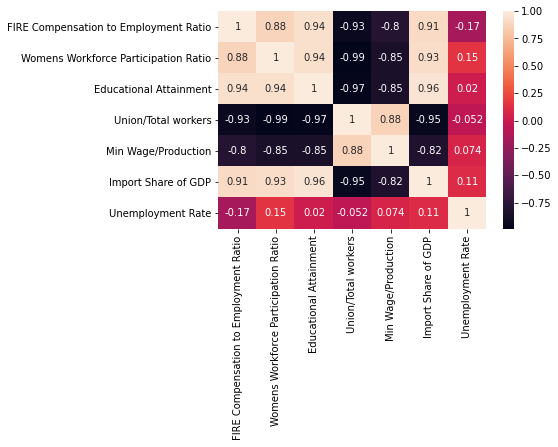

In [24]:
# Correlation matrix
corrMatrix = (Income_df[Explanatory_Index]).corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
# Discretize incomes
discrete_income_df = pd.DataFrame(columns = Income_df.columns)

Income_columns = ((Income_df.columns).to_numpy())[1:]
for i in Income_df.index:
    if i != len(Income_df)-1:
        discrete_income_df.loc[i] = (Income_df.loc[i+1]-Income_df.loc[i])/Income_df.loc[i]

discrete_income_df['Year'] = years_used[1:]
discrete_income_df.head()

,Year,Bottom 50,Middle 40,Next 9,Top 1,FIRE Compensation to Employment Ratio,Womens Workforce Participation Ratio,Educational Attainment,Union/Total workers,Min Wage/Production,Import Share of GDP,Unemployment Rate
0,1965,0.025696,-0.002921,-0.011730,-0.005410,-0.003452,0.007278,0.034163,-0.013652,-0.033708,0.024390,-0.200000
1,1966,0.022965,-0.002479,-0.011446,-0.003885,0.002864,0.013133,0.041877,-0.017301,-0.039568,0.095238,-0.050000
2,1967,0.066327,-0.004744,-0.021870,-0.046022,0.004704,0.017120,0.023365,-0.003521,0.066301,0.000000,0.000000
3,1968,-0.010526,-0.000227,0.001315,0.016353,0.002360,0.015105,0.042900,-0.003534,0.073036,0.065217,-0.105263
4,1969,0.032882,0.016345,-0.017075,-0.082060,-0.015519,0.017578,0.020308,-0.007092,-0.060423,0.020408,0.029412


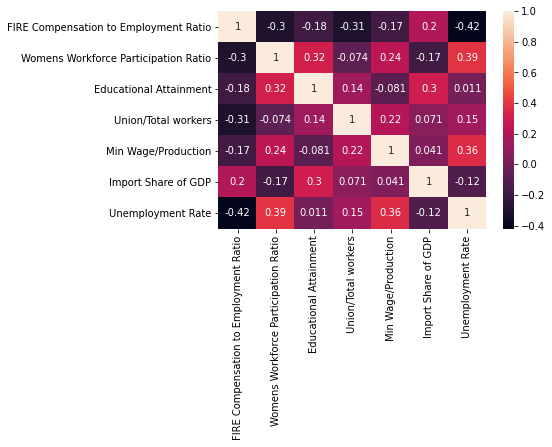

In [26]:
# Correlation matrix
corrMatrix = (discrete_income_df[Explanatory_Index]).corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [27]:
# Discrete income analysis
stats_df = pd.DataFrame(columns = ['Population', 'Explanatory Variable', 'Coefficient', 't-value', 'f-value', 'r-squared', 'durbin watson', 'dickey fuller'])

for dep in Dependent_Index:
    for exp_var in Explanatory_Index:
        X = sm.add_constant(discrete_income_df[exp_var].to_numpy())
        Y = discrete_income_df[dep].to_numpy()
        lr = sm.OLS(Y, X).fit()

        t = lr.tvalues[1]
        f = lr.fvalue
        rsq = lr.rsquared
        x1 = lr.params[1]
        dw = durbin_watson(lr.resid)
        ad = adfuller(discrete_income_df[exp_var].to_numpy())[0]

        stats_df.loc[len(stats_df)] = [dep, exp_var, x1, t, f, rsq, dw, ad]

In [28]:
stats_df.loc[stats_df['Population']==Dependent_Index[0]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
0,Bottom 50,FIRE Compensation to Employment Ratio,-0.441691,-3.642125,13.265074,0.200182,1.703837,-5.757025
1,Bottom 50,Womens Workforce Participation Ratio,0.485979,1.282986,1.646053,0.030122,1.602107,-3.259403
2,Bottom 50,Educational Attainment,0.236121,1.310323,1.716946,0.031379,1.664647,-1.239878
3,Bottom 50,Union/Total workers,0.485099,3.927290,15.423609,0.225414,1.673810,-6.662179
4,Bottom 50,Min Wage/Production,0.087255,1.593612,2.539600,0.045726,1.549553,-5.837913
5,Bottom 50,Import Share of GDP,0.014166,0.368560,0.135837,0.002556,1.593588,-5.608533
6,Bottom 50,Unemployment Rate,0.010739,0.738435,0.545286,0.010184,1.563961,-5.705976


In [29]:
stats_df.loc[stats_df['Population']==Dependent_Index[1]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
7,Middle 40,FIRE Compensation to Employment Ratio,-0.310800,-5.309246,28.188094,0.347195,2.123028,-5.757025
8,Middle 40,Womens Workforce Participation Ratio,0.728818,4.060863,16.490606,0.237307,2.050267,-3.259403
9,Middle 40,Educational Attainment,0.086205,0.887708,0.788025,0.014651,1.908897,-1.239878
10,Middle 40,Union/Total workers,0.083598,1.128118,1.272650,0.023449,1.949305,-6.662179
11,Middle 40,Min Wage/Production,0.044274,1.509843,2.279625,0.041238,1.913937,-5.837913
12,Middle 40,Import Share of GDP,-0.053571,-2.790067,7.784473,0.128067,1.897930,-5.608533
13,Middle 40,Unemployment Rate,0.032092,4.977617,24.776674,0.318562,2.369089,-5.705976


In [30]:
stats_df.loc[stats_df['Population']==Dependent_Index[2]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
14,Next 9,FIRE Compensation to Employment Ratio,0.044143,0.700442,0.490619,0.009172,1.890530,-5.757025
15,Next 9,Womens Workforce Participation Ratio,-0.274186,-1.561538,2.438402,0.043984,1.901416,-3.259403
16,Next 9,Educational Attainment,-0.065210,-0.767021,0.588321,0.010979,1.875688,-1.239878
17,Next 9,Union/Total workers,-0.125279,-1.981390,3.925908,0.068965,1.930541,-6.662179
18,Next 9,Min Wage/Production,-0.046673,-1.839538,3.383899,0.060015,1.771622,-5.837913
19,Next 9,Import Share of GDP,-0.022150,-1.250792,1.564479,0.028672,1.812798,-5.608533
20,Next 9,Unemployment Rate,-0.001607,-0.235639,0.055526,0.001047,1.844020,-5.705976


In [31]:
stats_df.loc[stats_df['Population']==Dependent_Index[3]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
21,Top 1,FIRE Compensation to Employment Ratio,1.328455,5.830636,33.996318,0.390779,2.247353,-5.757025
22,Top 1,Womens Workforce Participation Ratio,-2.121277,-2.737132,7.491892,0.123850,1.916605,-3.259403
23,Top 1,Educational Attainment,-0.329364,-0.841203,0.707623,0.013175,1.913047,-1.239878
24,Top 1,Union/Total workers,-0.599096,-2.060905,4.247329,0.074193,2.019494,-6.662179
25,Top 1,Min Wage/Production,-0.181669,-1.538967,2.368420,0.042776,1.907034,-5.837913
26,Top 1,Import Share of GDP,0.121887,1.502282,2.256852,0.040843,1.847920,-5.608533
27,Top 1,Unemployment Rate,-0.109100,-3.943061,15.547729,0.226816,2.066994,-5.705976


In [32]:
# Discretize incomes
discrete_wealth_df = pd.DataFrame(columns = Wealth_df.columns)

Wealth_columns = ((Wealth_df.columns).to_numpy())[1:]
for i in Wealth_df.index:
    if i != len(Wealth_df)-1:
        discrete_wealth_df.loc[i] = (Wealth_df.loc[i+1]-Wealth_df.loc[i])/Wealth_df.loc[i]

discrete_wealth_df['Year'] = years_used[1:]
discrete_wealth_df.head()

,Year,Bottom 50,Middle 40,Next 9,Top 1,FIRE Compensation to Employment Ratio,Womens Workforce Participation Ratio,Educational Attainment,Union/Total workers,Min Wage/Production,Import Share of GDP,Unemployment Rate
0,1965,0.008734,0.013838,-0.006579,-0.004695,-0.003452,0.007278,0.034163,-0.013652,-0.033708,0.024390,-0.200000
1,1966,0.012987,0.013290,-0.005913,-0.004717,0.002864,0.013133,0.041877,-0.017301,-0.039568,0.095238,-0.050000
2,1967,-0.059829,0.046437,-0.023555,-0.006927,0.004704,0.017120,0.023365,-0.003521,0.066301,0.000000,0.000000
3,1968,-0.113636,-0.052168,0.003411,0.060940,0.002360,0.015105,0.042900,-0.003534,0.073036,0.065217,-0.105263
4,1969,0.220513,0.083989,-0.020884,-0.066782,-0.015519,0.017578,0.020308,-0.007092,-0.060423,0.020408,0.029412


In [33]:
# Discretize incomes
stats_df = pd.DataFrame(columns = ['Population', 'Explanatory Variable', 'Coefficient', 't-value', 'f-value', 'r-squared', 'durbin watson', 'dickey fuller'])

for dep in Dependent_Index:
    for exp_var in Explanatory_Index:
        X = sm.add_constant(discrete_wealth_df[exp_var].to_numpy())
        Y = discrete_wealth_df[dep].to_numpy()
        lr = sm.OLS(Y, X).fit()

        t = lr.tvalues[1]
        f = lr.fvalue
        rsq = lr.rsquared
        x1 = lr.params[1]
        dw = durbin_watson(lr.resid)
        ad = adfuller(discrete_wealth_df[exp_var].to_numpy())[0]

        stats_df.loc[len(stats_df)] = [dep, exp_var, x1, t, f, rsq, dw, ad]

In [34]:
stats_df.loc[stats_df['Population']==Dependent_Index[0]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
0,Bottom 50,FIRE Compensation to Employment Ratio,0.006070,0.010562,0.000112,0.000002,1.548730,-5.757025
1,Bottom 50,Womens Workforce Participation Ratio,0.792753,0.487430,0.237588,0.004463,1.531414,-3.259403
2,Bottom 50,Educational Attainment,0.255811,0.330009,0.108906,0.002051,1.573018,-1.239878
3,Bottom 50,Union/Total workers,-0.421412,-0.711887,0.506783,0.009471,1.598026,-6.662179
4,Bottom 50,Min Wage/Production,-0.712523,-3.292087,10.837838,0.169771,1.872591,-5.837913
5,Bottom 50,Import Share of GDP,-0.195767,-1.216965,1.481003,0.027184,1.540316,-5.608533
6,Bottom 50,Unemployment Rate,-0.100220,-1.659268,2.753171,0.049381,1.506029,-5.705976


In [35]:
stats_df.loc[stats_df['Population']==Dependent_Index[1]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
7,Middle 40,FIRE Compensation to Employment Ratio,-0.358166,-1.964990,3.861187,0.067905,2.692942,-5.757025
8,Middle 40,Womens Workforce Participation Ratio,1.036187,2.007168,4.028723,0.070644,2.758832,-3.259403
9,Middle 40,Educational Attainment,0.292043,1.160073,1.345769,0.024763,2.867156,-1.239878
10,Middle 40,Union/Total workers,-0.013523,-0.069207,0.004790,0.000090,2.639517,-6.662179
11,Middle 40,Min Wage/Production,0.060969,0.785833,0.617533,0.011517,2.590214,-5.837913
12,Middle 40,Import Share of GDP,0.033633,0.630053,0.396967,0.007434,2.667353,-5.608533
13,Middle 40,Unemployment Rate,0.007862,0.386842,0.149647,0.002816,2.659274,-5.705976


In [36]:
stats_df.loc[stats_df['Population']==Dependent_Index[2]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
14,Next 9,FIRE Compensation to Employment Ratio,-0.241434,-2.176933,4.739038,0.082077,2.457025,-5.757025
15,Next 9,Womens Workforce Participation Ratio,-0.086565,-0.263822,0.069602,0.001312,2.262912,-3.259403
16,Next 9,Educational Attainment,0.117247,0.754149,0.568740,0.010617,2.201558,-1.239878
17,Next 9,Union/Total workers,0.167079,1.420877,2.018890,0.036694,2.380418,-6.662179
18,Next 9,Min Wage/Production,0.014526,0.303862,0.092332,0.001739,2.287393,-5.837913
19,Next 9,Import Share of GDP,-0.029404,-0.901864,0.813359,0.015114,2.237727,-5.608533
20,Next 9,Unemployment Rate,0.028290,2.385783,5.691960,0.096980,2.339182,-5.705976


In [37]:
stats_df.loc[stats_df['Population']==Dependent_Index[3]]

,Population,Explanatory Variable,Coefficient,t-value,f-value,r-squared,durbin watson,dickey fuller
21,Top 1,FIRE Compensation to Employment Ratio,0.684795,4.054147,16.436111,0.236708,1.978037,-5.757025
22,Top 1,Womens Workforce Participation Ratio,-0.900977,-1.686475,2.844198,0.050931,1.689259,-3.259403
23,Top 1,Educational Attainment,-0.517312,-2.059399,4.241124,0.074092,1.987639,-1.239878
24,Top 1,Union/Total workers,-0.090306,-0.452169,0.204457,0.003843,1.729363,-6.662179
25,Top 1,Min Wage/Production,-0.047004,-0.590126,0.348249,0.006528,1.694160,-5.837913
26,Top 1,Import Share of GDP,0.003646,0.066458,0.004417,0.000083,1.703306,-5.608533
27,Top 1,Unemployment Rate,-0.040676,-2.025897,4.104261,0.071873,1.822662,-5.705976
